In [58]:
# This project's purpose is to explore NFL data from 2009-2017. 
# The goal is to hopefully provide useful analysis for the project
# Group 12 - 
    # Mansi Parkhi 
    # Harshita Gupta
    # Karthik Mandadi
    # Harshitha Yata
    # Lokesh Chowdary Vemula
    # Sowri Madduru
    # Shanmukh Kanneganti


In [59]:
%matplotlib inline

# Essentials: Data Cleansing and ETL
import numpy as np
import pandas as pd


# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerLine2D

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc # good for evaluation of binary classification problems
from sklearn.model_selection import train_test_split

In [60]:
# Import the data 
df=pd.read_csv("C:/Users/mansi/Downloads/Fall 2021/KDD/KDDFinalProject/data/data.csv",low_memory=False)
df.head(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [62]:
# Exploratory Analysis - To Predict the Play type
"""
We have 102 Columns of data which is lot more data than we need to build the potential models. 
More attributes can typically cause over-fitting for any method we decide to impliment.

"""

'\nWe have 102 Columns of data which is lot more data than we need to build the potential models. \nMore attributes can typically cause over-fitting for any method we decide to impliment.\n\n'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [64]:
# Looking into Play calling
# take the dataframe for field goals above and shorten the scope of the columns and  
# find any interesting aspects that could be related to the play calls.
play_attributes = ['GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','PassAttempt','RushAttempt','Yards.Gained','posteam','DefensiveTeam','PosTeamScore','DefTeamScore','Season']
plays = df[play_attributes]
plays = plays[plays.PlayType.notna()  & (plays.PlayType != 'No Play') & (plays.PlayType != 'Kickoff') & (plays.PlayType != 'Extra Point')]
plays=plays.rename(columns = {'posteam':'Team'})
plays.head(5)

,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,PlayType,PassAttempt,RushAttempt,Yards.Gained,Team,DefensiveTeam,PosTeamScore,DefTeamScore,Season
1,2009091000,1,3593.0,58.0,10,1,1.0,Pass,1,0,5,PIT,TEN,0.0,0.0,2009
2,2009091000,1,3556.0,53.0,5,1,2.0,Run,0,1,-3,PIT,TEN,0.0,0.0,2009
3,2009091000,1,3515.0,56.0,8,1,3.0,Pass,1,0,0,PIT,TEN,0.0,0.0,2009
4,2009091000,1,3507.0,56.0,8,1,4.0,Punt,0,0,0,PIT,TEN,0.0,0.0,2009
5,2009091000,1,3496.0,98.0,10,2,1.0,Run,0,1,0,TEN,PIT,0.0,0.0,2009


<ipython-input-65-8efec583e222>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = regulation_plays.groupby(['qtr'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['blue','red'],rot=0,fontsize=16)


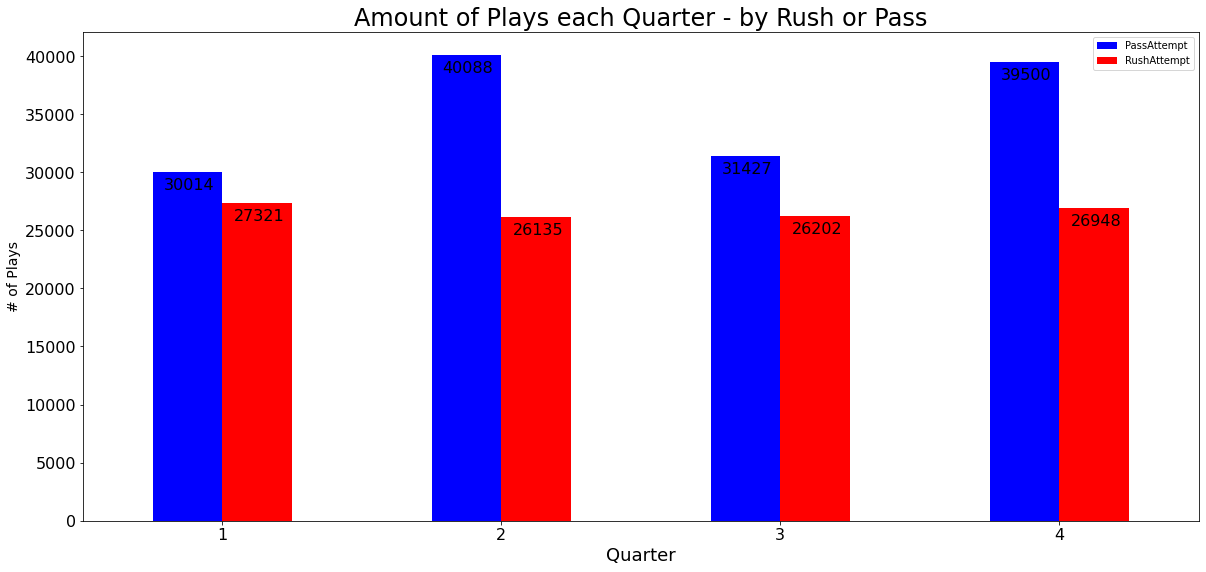

In [65]:
# Pass and Rush Attempts League-Wide by Quarter of the Game:

# group by quarter: count
regulation_plays = plays[plays.qtr != 5]
ax = regulation_plays.groupby(['qtr'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['blue','red'],rot=0,fontsize=16)
ax.set_title("Amount of Plays each Quarter - by Rush or Pass", fontsize=24)
ax.set_xlabel("Quarter", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()-1500, str(round((i.get_height()), 2)), fontsize=16, color='black',rotation=0)

In [66]:
"""
Passing plays appear to be more prevalent in all categories. 
The NFL's play calling has recently shifted to a more pass-friendly offensive style, 
increasing the worth of high-caliber quarterbacks. 
The final goal is to figure out if teams are running or passing the ball, so getting a sense of the aggregation is crucial. 
The amount of passing attempts spikes in the second and fourth quarters, 
whereas the amount of rushing attempts remains pretty stable throughout the quarters. 
This is most likely due to teams attempting to score before the second half possession changes or to win 
at the end of the game due to the time-friendly rule 
that the clock stops after an incomplete pass and the ability to throw the ball to the sideline to stop the clock.

"""

"\nPassing plays appear to be more prevalent in all categories. \nThe NFL's play calling has recently shifted to a more pass-friendly offensive style, \nincreasing the worth of high-caliber quarterbacks. \nThe final goal is to figure out if teams are running or passing the ball, so getting a sense of the aggregation is crucial. \nThe amount of passing attempts spikes in the second and fourth quarters, \nwhereas the amount of rushing attempts remains pretty stable throughout the quarters. \nThis is most likely due to teams attempting to score before the second half possession changes or to win \nat the end of the game due to the time-friendly rule \nthat the clock stops after an incomplete pass and the ability to throw the ball to the sideline to stop the clock.\n\n"

<ipython-input-67-48043611ad51>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['blue','red'],rot=0,fontsize=16)


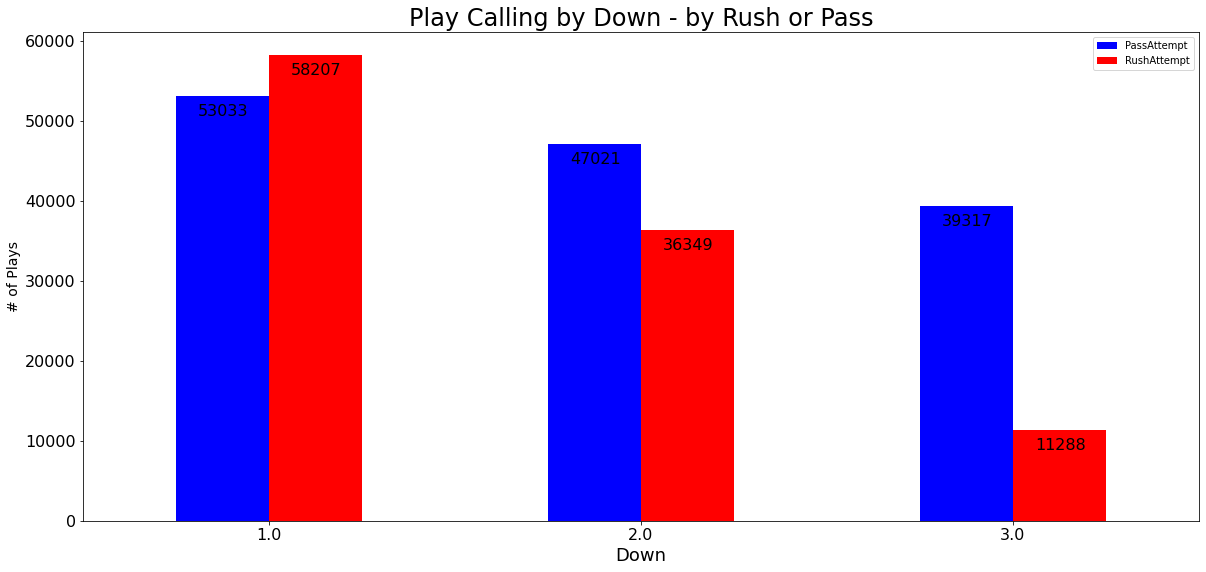

In [67]:
# Play call by down
plays_down = plays[plays.down <= 3]
ax = plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['blue','red'],rot=0,fontsize=16)
ax.set_title("Play Calling by Down - by Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x: width; get_height: verticle
    ax.text(i.get_x()+.06, i.get_height()-2400, str(round((i.get_height()), 2)), fontsize=16, color='black',rotation=0)

<ipython-input-68-d00286f421d4>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = plays_down.groupby(['Season','GameID'])['PassAttempt','RushAttempt'].sum().plot.line(color=['blue','red'],figsize=(20,9),rot=0,fontsize=16)


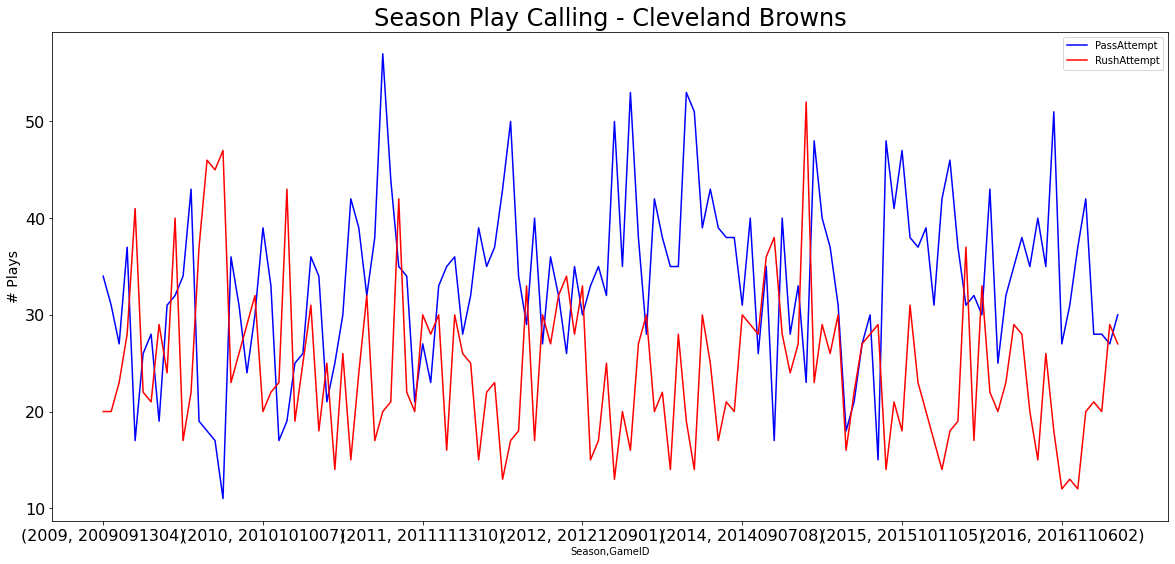

In [68]:
# Season Play calling 
plays_down = plays[(plays.down <= 3) & (plays.qtr < 5) & (plays.Team == 'CLE')]
ax = plays_down.groupby(['Season','GameID'])['PassAttempt','RushAttempt'].sum().plot.line(color=['blue','red'],figsize=(20,9),rot=0,fontsize=16)
ax.set_title("Season Play Calling - Cleveland Browns", fontsize=24)
ax.set_ylabel("# Plays", fontsize=14)
ax.set_alpha(0.8)

In [69]:
"""
To maximize the potential, in order to minimize the losses.
Offensive Averages by quarter
"""

'\nTo maximize the potential, in order to minimize the losses.\nOffensive Averages by quarter\n'

In [70]:
# Get average results for offensive plays by game for model
# to preserve the dataframe's shape (with GameID being unique), Use a split-apply-merge strategy

# Split - from origional DF: Get 2 DF's for plays that are labeled Run or Pass
run_off_agg = df[(df.PlayType == 'Run')]
pass_off_agg = df[(df.PlayType == 'Pass')|(df.PlayType == 'Sack')]

# Apply - groupby aggregation to find the Median yards by game, team, PlayType, and qtr
run_off_agg = run_off_agg.groupby(['GameID','qtr','posteam'])['Yards.Gained'].mean().reset_index()
pass_off_agg = pass_off_agg.groupby(['GameID','qtr','posteam'])['Yards.Gained'].mean().reset_index()

run_off_agg = run_off_agg.rename(columns={'Yards.Gained':'RushingMean'}) # Rename the columns for clarity
pass_off_agg = pass_off_agg.rename(columns={'Yards.Gained':'PassingMean'})

# Merge - Combine the Away and Home averages into one dataframe
off_agg = pd.merge(run_off_agg,
                 pass_off_agg,
                 left_on=['GameID','qtr','posteam'],
                 right_on=['GameID','qtr','posteam'],
                 how='outer')

off_agg.head(8)

,GameID,qtr,posteam,RushingMean,PassingMean
0,2009091000,1,PIT,0.333333,-0.125000
1,2009091000,1,TEN,6.166667,6.222222
2,2009091000,2,PIT,2.500000,9.062500
3,2009091000,2,TEN,1.400000,8.307692
4,2009091000,3,PIT,2.000000,3.000000
5,2009091000,3,TEN,4.222222,3.833333
6,2009091000,4,PIT,1.666667,8.750000
7,2009091000,4,TEN,0.800000,5.875000


In [71]:
# Offensive Tendencies and trends
offensive_tendencies = df[df.PlayType.notna()&
              (df.PlayType != 'No Play')&
              (df.PlayType != 'Kickoff')&
              (df.PlayType != 'Extra Point')&
              (df.PlayType != 'End of Game')&
              (df.PlayType != 'Quarter End')&
              (df.PlayType != 'Half End')&
              (df.PlayType != 'Two Minute Warning')&
              (df.PlayType != 'Field Goal')&
              (df.PlayType != 'Punt') &
              (df.PlayAttempted == 1)]

# Moving average by team, quarter, and season. This is a rolling average to consider recent decisions to compensate for coaching changes
offensive_tendencies = offensive_tendencies.groupby(['GameID','posteam','Season','qtr'])['PassAttempt','RushAttempt'].sum().reset_index()
offensive_tendencies['PassingWA']=offensive_tendencies.groupby(['posteam','qtr','Season']).PassAttempt.apply(lambda x: x.shift().rolling(8,min_periods=1).mean().fillna(x))
offensive_tendencies['RushingWA']=offensive_tendencies.groupby(['posteam','qtr','Season']).RushAttempt.apply(lambda x: x.shift().rolling(8,min_periods=1).mean().fillna(x))
offensive_tendencies = offensive_tendencies.drop(columns=['PassAttempt', 'RushAttempt'])
offensive_tendencies[(offensive_tendencies.posteam == 'CLE')&(offensive_tendencies.qtr == 1)].head(10)

<ipython-input-71-d89a0d485652>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offensive_tendencies = offensive_tendencies.groupby(['GameID','posteam','Season','qtr'])['PassAttempt','RushAttempt'].sum().reset_index()


,GameID,posteam,Season,qtr,PassingWA,RushingWA
41,2009091304,CLE,2009,1,5.000000,6.000000
225,2009092012,CLE,2009,1,5.000000,6.000000
261,2009092700,CLE,2009,1,6.500000,8.500000
398,2009100401,CLE,2009,1,6.333333,7.333333
511,2009101101,CLE,2009,1,5.500000,5.750000
655,2009101805,CLE,2009,1,5.000000,6.800000
737,2009102501,CLE,2009,1,5.000000,7.166667
853,2009110102,CLE,2009,1,5.142857,7.142857
1157,2009111600,CLE,2009,1,5.125000,7.125000
1185,2009112202,CLE,2009,1,5.125000,7.125000


In [72]:
# To minimize the data size, We will select one team - CLE
team = 'CLE'

In [73]:
# take the dataframe for plays above and define particular columns we want
play_attributes = ['PlayAttempted','GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','GoalToGo',
             'TimeUnder','PlayTimeDiff','PassAttempt','RushAttempt','posteam','DefensiveTeam','PosTeamScore',
             'DefTeamScore','Season','HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','No_Score_Prob',
             'Opp_Field_Goal_Prob','Opp_Safety_Prob','Win_Prob','HomeTeam','ExpPts']
plays = df[play_attributes]


# filter out the records that we wont use to predict run or pass
plays = plays[plays.PlayType.notna()&
              (plays.PlayType != 'No Play')&
              (plays.PlayType != 'Kickoff')&
              (plays.PlayType != 'Extra Point')&
              (plays.PlayType != 'End of Game')&
              (plays.PlayType != 'Quarter End')&
              (plays.PlayType != 'Half End')&
              (plays.PlayType != 'Two Minute Warning')&
              (plays.PlayType != 'Field Goal')&
              (plays.PlayType != 'Punt')]

# assure that there was a play attempted to filter out penalties before the play occured.
plays = plays[plays.PlayAttempted == 1]

# add data regarding offensive stats
plays = pd.merge(plays,
                off_agg,
                left_on=['GameID','qtr','posteam'],
                right_on=['GameID','qtr','posteam'],
                how='left')

# merge data for moving average play calling tendencies
plays = pd.merge(plays,
                offensive_tendencies,
                left_on=['GameID','qtr','posteam','Season'],
                right_on=['GameID','qtr','posteam','Season'],
                how='left')

plays=plays.rename(columns = {'posteam':'Team'})

# filter on just possessions by the cleveland browns (woof woof)
plays = plays[(plays['Team'] == team)]
plays.head(5)

,PlayAttempted,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,PlayType,GoalToGo,...,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Win_Prob,HomeTeam,ExpPts,RushingMean,PassingMean,PassingWA,RushingWA
139,1,2009091304,1,3599.0,51.0,10,1,1.0,Run,0.0,...,0.000789,0.089622,0.000574,0.562755,CLE,2.861271,2.666667,4.2,5.0,6.0
140,1,2009091304,1,3559.0,45.0,4,1,2.0,Pass,0.0,...,0.000841,0.081257,0.000497,0.572188,CLE,3.077808,2.666667,4.2,5.0,6.0
141,1,2009091304,1,3553.0,45.0,4,1,3.0,Run,0.0,...,0.000944,0.102046,0.000827,0.547411,CLE,2.293212,2.666667,4.2,5.0,6.0
142,1,2009091304,1,3515.0,40.0,10,1,1.0,Pass,0.0,...,0.000812,0.064420,0.000212,0.590727,CLE,3.560237,2.666667,4.2,5.0,6.0
143,1,2009091304,1,3469.0,22.0,10,1,1.0,Pass,0.0,...,0.000563,0.035982,0.000040,0.619625,CLE,4.336499,2.666667,4.2,5.0,6.0


In [74]:
# get score difference for each play cleveland is in possession of the ball
plays['ScoreDiff'] = plays['PosTeamScore'] - plays['DefTeamScore']

# add column to show boolean indicator for whether the team  is winning or losing
plays['CurrentScoreBool'] = plays.apply(lambda x: 1 if x.ScoreDiff > 0 else 0, axis=1)

# add column to show if the team is playing at home
plays['Home'] = plays.apply(lambda x: 1 if x.HomeTeam == team else 0, axis=1)

# changing the timeouts attributes to reflect the posteam: CLE and the defensive teams remaining timeouts
plays['PosTO_PreSnap'] = plays.apply(lambda x: x.HomeTimeouts_Remaining_Pre if x.HomeTimeouts_Remaining_Pre == team else x.AwayTimeouts_Remaining_Pre, axis=1)
plays['DefTO_PreSnap'] = plays.apply(lambda x: x.HomeTimeouts_Remaining_Pre if x.HomeTimeouts_Remaining_Pre != team else x.AwayTimeouts_Remaining_Pre, axis=1)

# indicator for 2-minute situations
plays['TwoMinuteDrill'] = plays.apply(lambda x: 1 if (
    (((x.TimeSecs <= 0)&(x.TimeSecs >= 120))|((x.TimeSecs <= 1920)&(x.TimeSecs >= 1800)))&
    (x.CurrentScoreBool == 0)) else 0, axis=1)

In [75]:
#  Clean the data
# Clean the float data
plays.TimeSecs = plays.TimeSecs.fillna(0).astype(int)
plays.yrdline100 = plays.yrdline100.fillna(0).astype(int)
plays.down = plays.down.fillna(0).astype(int)
plays.PosTeamScore = plays.PosTeamScore.fillna(0).astype(int)
plays.DefTeamScore = plays.DefTeamScore.fillna(0).astype(int)
plays.RushingMean = plays.RushingMean.fillna(0).astype(int)
plays.PassingMean = plays.PassingMean.fillna(0).astype(int)
plays.ScoreDiff = plays.ScoreDiff.fillna(0).astype(int)
plays.PlayTimeDiff = plays.PlayTimeDiff.fillna(0).astype(int)
plays.GoalToGo = plays.GoalToGo.fillna(0).astype(int)

plays.RushingWA = plays.RushingWA.fillna(0).round(0).astype(int)
plays.PassingWA = plays.PassingWA.fillna(0).round(0).astype(int)


# play type changed to integer using map - removing others
# PlayTypes = {"Run": 0, "QB Kneel": 0, "Pass": 1, "Sack": 1, "Spike": 1}
# cle.PlayType = cle.PlayType.map(PlayTypes)
# cle.PlayType = cle.PlayType.fillna(0)
# cle.PlayType = cle.PlayType.astype(int)
plays = plays[(plays.PassAttempt == 1)|(plays.RushAttempt == 1)]
plays['PlayType'] = plays.apply(lambda x: 1 if x.PassAttempt == 1 else 0, axis=1)
plays.PlayType = plays.PlayType.fillna(0).astype(int)


# changing float64 to float32
plays.No_Score_Prob = plays.No_Score_Prob.fillna(0).astype(np.float32)
plays.Opp_Field_Goal_Prob = plays.Opp_Field_Goal_Prob.fillna(0).astype(np.float32)
plays.Opp_Safety_Prob = plays.Opp_Safety_Prob.fillna(0).astype(np.float32)
plays.Win_Prob = plays.Win_Prob.fillna(0).astype(np.float32)
plays.ExpPts = plays.ExpPts.fillna(0).astype(np.float32)


plays.No_Score_Prob = pd.qcut(plays['No_Score_Prob'], 5, labels=False)
plays.Opp_Field_Goal_Prob = pd.qcut(plays['Opp_Field_Goal_Prob'], 5, labels=False)
plays.Opp_Safety_Prob = pd.qcut(plays['Opp_Safety_Prob'], 5, labels=False)
plays.Win_Prob = pd.qcut(plays['Win_Prob'], 5, labels=False)
plays.ExpPts = pd.qcut(plays['ExpPts'], 5, labels=False)

In [76]:
#  Drop unwanted columns 
plays = plays[plays.down != 0]
plays = plays.drop(columns=['PlayAttempted','HomeTeam','Team','DefensiveTeam',
                        'HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','RushAttempt','PassAttempt'])

plays = plays.rename(columns = {'Drive_x':'Drive'})
plays.head(5)

,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,PlayType,GoalToGo,TimeUnder,...,RushingMean,PassingMean,PassingWA,RushingWA,ScoreDiff,CurrentScoreBool,Home,PosTO_PreSnap,DefTO_PreSnap,TwoMinuteDrill
139,2009091304,1,3599,51,10,1,1,0,0,15,...,2,4,5,6,0,0,1,3,3,0
140,2009091304,1,3559,45,4,1,2,1,0,15,...,2,4,5,6,0,0,1,3,3,0
141,2009091304,1,3553,45,4,1,3,0,0,15,...,2,4,5,6,0,0,1,3,3,0
142,2009091304,1,3515,40,10,1,1,1,0,14,...,2,4,5,6,0,0,1,3,3,0
143,2009091304,1,3469,22,10,1,1,1,0,13,...,2,4,5,6,0,0,1,3,3,0


In [77]:
# Define our prediction data
plays_predictors = ['ydstogo','down','ScoreDiff','PosTO_PreSnap','No_Score_Prob','Drive','Season','TimeSecs','TimeUnder','PlayTimeDiff','Opp_Field_Goal_Prob']
X = plays[plays_predictors]

# Define the prediction target: PlayType
y = plays.PlayType

In [78]:
# Split our data into training and test data for both our target and prediction data sets
# random state = 0 means we get same result everytime if we want ot change later
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [79]:
# Building Models and Making Predictions
# Models which we have taken into consideration
# Random Forest Classification, K-Means Clustering, Gaussian Naive Bayes, Gradient Boosting Classifier

In [80]:
# Random Forest Classification
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)

randomforest_predictions = random_forest.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, randomforest_predictions)
randomforest_roc_auc = auc(false_positive_rate, true_positive_rate)

In [81]:
# K-Means Clustering
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)

knn_predictions = knn.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, knn_predictions)
knn_roc_auc = auc(false_positive_rate, true_positive_rate)

In [82]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_X, train_y)

gaussian_predictions = gnb.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, gaussian_predictions)
gaussian_predictions_roc_auc = auc(false_positive_rate, true_positive_rate)

In [83]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)

gradientboosting_predictions = gbc.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, gradientboosting_predictions)
gradientboosting_predictions_roc_auc = auc(false_positive_rate, true_positive_rate)

In [84]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN',
              'Naive Bayes', 'Gradient Boosting Classifier'],
    'AUC': [randomforest_roc_auc, knn_roc_auc, gaussian_predictions_roc_auc, gradientboosting_predictions_roc_auc]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('AUC')
result_df.head(7)

,Model
AUC,
0.694628,Gradient Boosting Classifier
0.687154,Random Forest
0.635977,Naive Bayes
0.549426,KNN


In [85]:
#  Gradient Boosting Classifier is the best model to predict the run or pass

<AxesSubplot:xlabel='feature'>

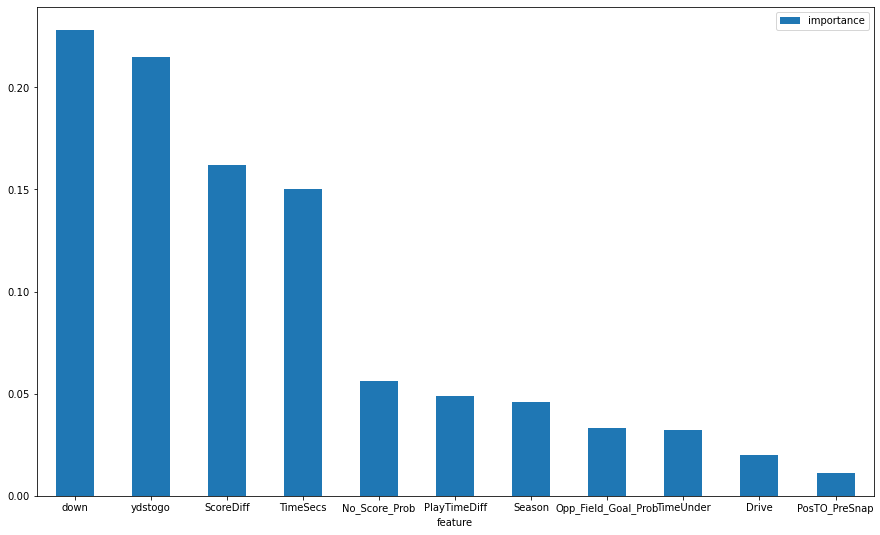

In [86]:
#  Feature importance
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(gbc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(15,9),rot=0)

In [87]:
# Gradient Boosting Classification Tuning
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 0)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6939964157706092

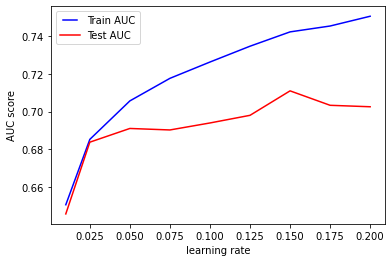

In [88]:
# a couple learning rates to see how they affect the outcome of our model
learning_rates = [0.2, 0.175 ,0.15, 0.125, 0.1, 0.075, 0.05, 0.025, 0.01]

train_results = []
test_results = []
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

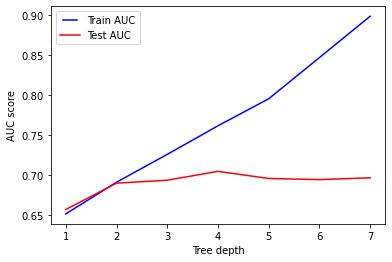

In [89]:
# Max depths
max_depths = np.linspace(1, 7, 7, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

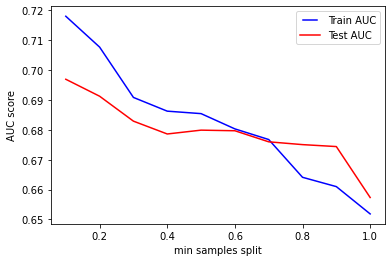

In [90]:
# Minimum Samples Split 

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

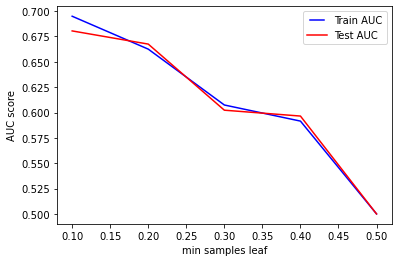

In [91]:
# Minimum Leaf Sample
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

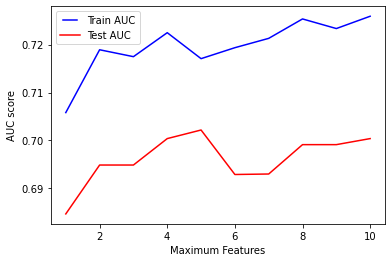

In [92]:
# Maximum features
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Maximum Features')
plt.show()